In [1]:
import datajoint as dj
import numpy as np
import time

from meshparty import trimesh_io
import pandas as pd
import seaborn as sns
sns.set() #sets the asethetics parameters in what set

In [2]:
#setting the address and the username
dj.config['database.host'] = '10.28.0.34'
dj.config['database.user'] = 'celiib'
dj.config['database.password'] = 'newceliipass'
dj.config['safemode']=True
dj.config["display.limit"] = 20

schema = dj.schema('microns_ta3p100')
ta3p100 = dj.create_virtual_module('ta3p100', 'microns_ta3p100')


Connecting celiib@10.28.0.34:3306


In [3]:
#creates the table with spine data without the spine label
#how to filter out the spine proportion

#have to first remove the ones that have only spine synapses


neurite_targets_no_spine = (ta3p100.NeuriteTargetsRevised() & "spine_num<total").proj(spine_head_prop="spine_head_prop/(1-spine_prop)",
                                                         spine_neck_prop="spine_neck_prop/(1-spine_prop)",
                                                         shaft_prop="shaft_prop/(1-spine_prop)",
                                                         non_spine_prop="non_spine_prop/(1-spine_prop)",
                                                         total="total-spine_num")



In [4]:
#different lengths based on the number of synapses threshold

print(len(neurite_targets_no_spine))
print(len(neurite_targets_no_spine & "total>12"))
print(len(neurite_targets_no_spine & "total>10")) 
print(len(neurite_targets_no_spine & "total>8")) 
print(len(neurite_targets_no_spine & "total>6")) 

32068
1169
2068
3875
7473


In [5]:
neurite_targets_no_spine_6 = (neurite_targets_no_spine & "total>6")
neurite_targets_no_spine_6

segmentation segmentation id,segment_id segment id unique within each Segmentation,spine_head_prop calculated attribute,spine_neck_prop calculated attribute,shaft_prop calculated attribute,non_spine_prop calculated attribute,total calculated attribute
2,648518346341351512,0.8750000157160684,0.0,0.1250000010477379,0.0,8.0
2,648518346341351525,0.7777777658200559,0.11111111295076065,0.11111111295076065,0.0,9.0
2,648518346341351631,0.909090931504226,0.0,0.09090908610623727,0.0,11.0
2,648518346341351764,0.7272727489471436,0.27272728085517883,0.0,0.0,11.0
2,648518346341351767,0.75,0.125,0.125,0.0,8.0
2,648518346341351896,0.8571428656578064,0.1428571492433548,0.0,0.0,7.0
2,648518346341351900,1.0,0.0,0.0,0.0,7.0
2,648518346341351903,0.875,0.125,0.0,0.0,8.0
2,648518346341351904,0.0,0.09090909386469313,0.4545454449397473,0.4545454449397473,11.0
2,648518346341351976,0.5555555820465088,0.0,0.3333333432674408,0.1111111119389534,9.0


In [6]:
#get the portions of groups first
head_group = neurite_targets_no_spine_6 & "spine_head_prop>0.6"
head_group

segmentation segmentation id,segment_id segment id unique within each Segmentation,spine_head_prop calculated attribute,spine_neck_prop calculated attribute,shaft_prop calculated attribute,non_spine_prop calculated attribute,total calculated attribute
2,648518346341351512,0.8750000157160684,0.0,0.1250000010477379,0.0,8.0
2,648518346341351525,0.7777777658200559,0.11111111295076065,0.11111111295076065,0.0,9.0
2,648518346341351631,0.909090931504226,0.0,0.09090908610623727,0.0,11.0
2,648518346341351764,0.7272727489471436,0.27272728085517883,0.0,0.0,11.0
2,648518346341351767,0.75,0.125,0.125,0.0,8.0
2,648518346341351896,0.8571428656578064,0.1428571492433548,0.0,0.0,7.0
2,648518346341351900,1.0,0.0,0.0,0.0,7.0
2,648518346341351903,0.875,0.125,0.0,0.0,8.0
2,648518346341351999,0.8749999883584678,0.12500000232830644,0.0,0.0,8.0
2,648518346341352105,0.8571428571428571,0.0,0.14285714285714285,0.0,7.0


In [7]:
#get the portions of groups first
shaft_group = neurite_targets_no_spine_6 & "spine_head_prop<=0.6" & "shaft_prop>=0.5"
shaft_group

segmentation segmentation id,segment_id segment id unique within each Segmentation,spine_head_prop calculated attribute,spine_neck_prop calculated attribute,shaft_prop calculated attribute,non_spine_prop calculated attribute,total calculated attribute
2,648518346341352417,0.2857142984867096,0.2142857164144516,0.5,0.0,14.0
2,648518346341352553,0.25,0.0,0.625,0.125,8.0
2,648518346341352671,0.1428571492433548,0.1428571492433548,0.5714285969734192,0.1428571492433548,7.0
2,648518346341353409,0.3333333432674408,0.0,0.6666666865348816,0.0,12.0
2,648518346341353538,0.0,0.2857142984867096,0.7142857313156128,0.0,7.0
2,648518346341353780,0.0,0.375,0.5,0.125,8.0
2,648518346341354681,0.05882352987581471,0.05882352987581471,0.7647058686634661,0.11764705975162942,17.0
2,648518346341355237,0.10000000149011612,0.0,0.5,0.4000000059604645,10.0
2,648518346341356306,0.1428571492433548,0.0,0.5714285969734192,0.2857142984867096,7.0
2,648518346341356580,0.1111111119389534,0.1111111119389534,0.7777777910232544,0.0,9.0


In [8]:
unused = (neurite_targets_no_spine_6 - shaft_group.proj()) - head_group.proj()
unused

segmentation segmentation id,segment_id segment id unique within each Segmentation,spine_head_prop calculated attribute,spine_neck_prop calculated attribute,shaft_prop calculated attribute,non_spine_prop calculated attribute,total calculated attribute
2,648518346341351904,0.0,0.09090909386469313,0.4545454449397473,0.4545454449397473,11.0
2,648518346341351976,0.5555555820465088,0.0,0.3333333432674408,0.1111111119389534,9.0
2,648518346341352081,0.5,0.10000000149011612,0.4000000059604645,0.0,10.0
2,648518346341352411,0.5714285969734192,0.2857142984867096,0.1428571492433548,0.0,7.0
2,648518346341352442,0.1428571492433548,0.0,0.2857142984867096,0.5714285969734192,7.0
2,648518346341352789,0.0,0.0,0.3333333432674408,0.6666666865348816,9.0
2,648518346341353064,0.5555555820465088,0.2222222238779068,0.2222222238779068,0.0,9.0
2,648518346341353247,0.1785714328289032,0.1071428582072258,0.4285714328289032,0.2857142984867096,28.0
2,648518346341353475,0.1666666716337204,0.25,0.3333333432674408,0.25,12.0
2,648518346341354698,0.1818181872367859,0.09090909361839294,0.3636363744735718,0.3636363744735718,11.0


In [9]:
#check that the lengths are the same
print(len(neurite_targets_no_spine_6))
print(len(shaft_group) + len(head_group) + len(unused))

7473
7473


In [10]:

#pull down the head data and sort
head_data = head_group.fetch(as_dict=True)

head_df = pd.DataFrame(head_data)
head_df_base = head_df.drop(columns=['segmentation', 'segment_id',"total","non_spine_prop","spine_neck_prop"])

spine_df_base_head_shaft_sort = head_df_base.sort_values(['spine_head_prop','shaft_prop'], ascending=[False,True])
spine_df_base_head_shaft_sort



,spine_head_prop,shaft_prop
2673,1.0,0.0
5142,1.0,0.0
1112,1.0,0.0
2818,1.0,0.0
751,1.0,0.0
80,1.0,0.0
382,1.0,0.0
410,1.0,0.0
601,1.0,0.0
701,1.0,0.0


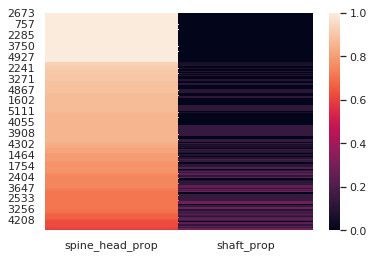

In [11]:
#heat map of spine heads
spine_head_shaft_sort = sns.heatmap(spine_df_base_head_shaft_sort)

In [12]:

#pull down the head data and sort
shaft_data = shaft_group.fetch(as_dict=True)

shaft_df = pd.DataFrame(shaft_data)
shaft_df_base = shaft_df.drop(columns=['segmentation', 'segment_id',"total","non_spine_prop","spine_neck_prop"])

shaft_df_base_head_shaft_sort = shaft_df_base.sort_values(['shaft_prop','spine_head_prop'], ascending=[True,False])
#shaft_df_base_head_shaft_sort



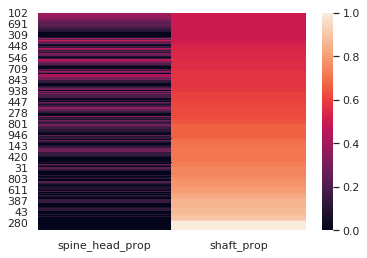

In [13]:
sns.heatmap(shaft_df_base_head_shaft_sort)

In [14]:

#pull down the head data and sort
unused_data = unused.fetch(as_dict=True)

unused_df = pd.DataFrame(unused_data)
unused_df_base = unused_df.drop(columns=['segmentation', 'segment_id',"total","non_spine_prop","spine_neck_prop"])

unused_df_base_head_shaft_sort = unused_df_base.sort_values(['shaft_prop','spine_head_prop'], ascending=[True,False])
unused_df_base_head_shaft_sort



,spine_head_prop,shaft_prop
28,0.571429,0.000000
38,0.571429,0.000000
61,0.571429,0.000000
161,0.571429,0.000000
240,0.571429,0.000000
242,0.571429,0.000000
350,0.571429,0.000000
378,0.571429,0.000000
446,0.571429,0.000000
487,0.571429,0.000000


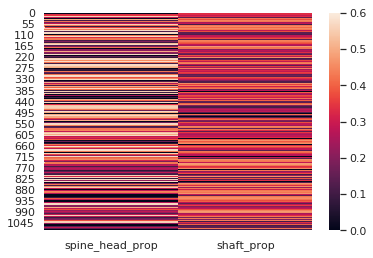

In [15]:
sns.heatmap(unused_df_base)

In [16]:
#### CAN'T END UP DOING NANS!
# nans = pd.DataFrame([dict(spine_head_prop=np.nan,shaft_prop=np.nan)]*100)
# sns.heatmap(nans)

In [17]:
# total = spine_df_base_head_shaft_sort +  shaft_df_base_head_shaft_sort + unused_df_base_head_shaft_sort



# total = pd.concat(spine_df_base_head_shaft_sort,
#           unused_df_base_head_shaft_sort,
#          shaft_df_base_head_shaft_sort)

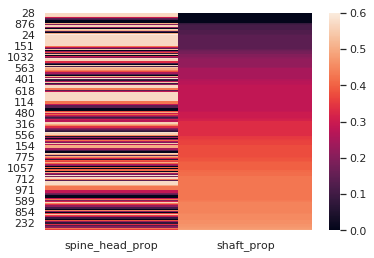

In [18]:
sns.heatmap(unused_df_base_head_shaft_sort)

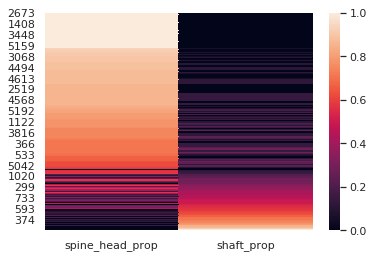

In [19]:
sns.heatmap(pd.concat([spine_df_base_head_shaft_sort,
          unused_df_base_head_shaft_sort,
         shaft_df_base_head_shaft_sort]))